In [1]:
from CDL_utils import *

In [3]:
cd = cdl_utils()

cd.load_np_cdl('cdl_illinois.npy')

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
cdl_data = cd.get_cdl_box_data(-86, -90, 38, 42)

In [3]:
import numpy as np

In [4]:
data = np.load('filtered_fpar_38428690.npy')

In [6]:
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

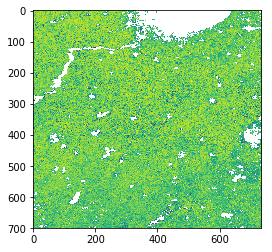

In [39]:
plt.imshow(data[:700,:,12])

In [17]:
from CDL_utils import *
cd = cdl_utils()
cd.load_np_cdl('cdl_illinois.npy')

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [27]:
from FPAR_utils import *

In [72]:
cd.max_lon

-86.608617

In [35]:
lat_offset, lon_offset = fp.coords_to_ind(42, -90)[0], fp.coords_to_ind(42, -90)[1]

In [37]:
cur_data = data[:,:,12]

In [38]:
cur_data.shape

(735, 735)

In [41]:
cd.cdl_data.shape

(11525, 15977)

In [81]:
predicted_fpar = np.zeros((520, 520))
accuracy = []
for i in range(50):
    for j in range(50):
        y = []
        x = []
        for lat_ind in range(10):
            for lon_ind in range(10):
                
                fpar_box = fp.get_fpar_bound(i*10 + lat_ind + lat_offset, j*10 + lon_ind + lon_offset)
                cur_cdl_box = cd.get_cdl_box_data(fpar_box[0],fpar_box[1],fpar_box[2],fpar_box[3])
                proportion = cd.get_proportion(cur_cdl_box)
                x.append(proportion)
                y.append(cur_data[lat_ind, lon_ind])
        result = lstsq(np.array(x), np.array(y))
        y = np.array(y)
        y_hat = np.array(x)@result[0]
        y_avg = np.mean(y)
        acc = ((y_hat - y).T@(y_hat-y))/((y_avg- y).T@(y_avg-y))
        accuracy.append(acc)
        y_hat = y_hat.reshape((10,10))
        predicted_fpar[i*10:i*10+10, j*10:j*10+10] = y_hat        

In [84]:
ct = 0
for i in accuracy:
    if i < 1:
        ct += 1

In [86]:
np.mean(accuracy)

12.239481531881022

This accuracy means that our $l_2$ error for out model prediction is on average 12.23 times the error of the null model

null model is $y = \frac{\sum_iy_i}{n}$

Text(0.5,1,'predicted_fpar')

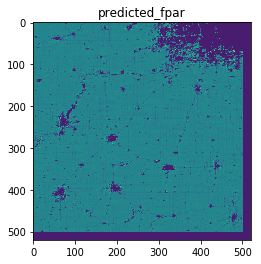

In [79]:
plt.imshow(predicted_fpar)
plt.title('predicted_fpar')

Text(0.5,1,'actual fpar')

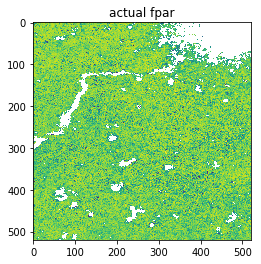

In [80]:
plt.imshow(cur_data[0:520, 0:520])
plt.title('actual fpar')

In [54]:
y_hat = np.array(x)@result[0]

In [55]:
import matplotlib.pyplot as plt

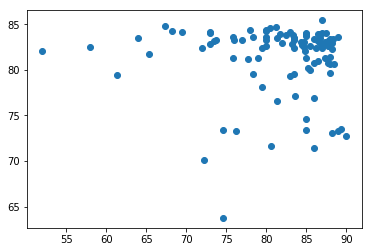

In [56]:
plt.scatter(y, y_hat)

In [57]:
import statsmodels.api as sm

C:\Users\Bowen\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [58]:
model  = sm.OLS(np.array(y), np.array(x)).fit()

In [59]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     2278.
Date:                Sun, 20 May 2018   Prob (F-statistic):           3.59e-94
Time:                        23:43:17   Log-Likelihood:                -354.09
No. Observations:                 100   AIC:                             716.2
Df Residuals:                      96   BIC:                             726.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            82.3637      1.745     47.200      0.000      78.900      85.828
x2            84.6406      3.135     26.998      0.000      78.417      90.864
x3            89.6265      7.509     11.936      0.000      74.721     104.532
x4            83.7155      3.244     25.809      0.000      77.277      90.154
==============================================================================
Omnibus:                       19.160   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.452
Skew:                          -0.944   Prob(JB):                     2.97e-06
Kurtosis:                       4.595   Cond. No.                         5.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""